In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
from agents.nash_q_learner import NashQLearner
from games.matrix_game import MatrixGame

In [4]:

nb_episode = 100

agent1 = NashQLearner(
    actions=np.arange(2))
agent2 = NashQLearner(
    actions=np.arange(2))

game = MatrixGame()
pi1_history = []
pi2_history = []
for episode in range(nb_episode):
    action1 = agent1.act()
    action2 = agent2.act()

    _, r1, r2 = game.step(action1, action2)

    agent1.observe(
        reward=r1,
        reward_o=r2,
        opponent_action=agent2.prev_action)
    agent2.observe(
        reward=r2,
        reward_o=r1,
        opponent_action=agent1.prev_action)

    pi1 = agent1.get_pi()
    pi2 = agent2.get_pi()
    pi1_history.append(pi1[0])
    pi2_history.append(pi2[0])





/home/okano/.pyenv/versions/3.6.0/lib/python3.6/site-packages/nashpy/integer_pivoting/integer_pivoting.py:31: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
/home/okano/.pyenv/versions/3.6.0/lib/python3.6/site-packages/nashpy/algorithms/lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
/home/okano/.pyenv/versions/3.6.0/lib/python3.6/site-packages/nashpy/integer_pivoting/integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])


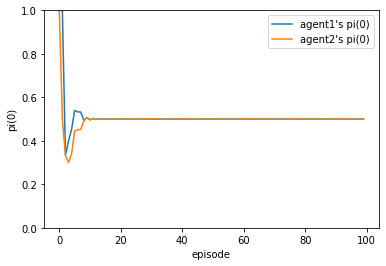

In [5]:
plt.plot(np.arange(len(pi1_history)),
         pi1_history, label="agent1's pi(0)")
plt.plot(np.arange(len(pi2_history)),
         pi2_history, label="agent2's pi(0)")
plt.xlabel("episode")
plt.ylabel("pi(0)")
plt.ylim(0, 1)
plt.legend()
plt.savefig("result.jpg")
plt.show()